# Predicción del salario según los años de experiencia.

## 1. Introducción

En este proyecto vamos a aplicar un modelo de **regresión lineal simple** para predecir el salario de una persona en función de sus años de experiencia. Utilizareos un conjunto de datos que contiene el salario y los años de experiencia de varios individuos.

El objetivo es construir un modelo capaz de predecir el salario de una persona basándose únicamente en su experiencia, evaluando el desempeño del modelo mediante las métricas de error y precisión.

El conjunto de datos contiene dos columnas:

- `YearsExperience`: los años de experiencia de la persona.
- `Salary`: el salario de la persona en función de esos años de experiencia

Este es un ejemplo clásic de regresión lineal simple, donde solo utilizaremos una característica para hacer la predicción.

En este notebook realizaremos las sigientes tareas:

- Cargar y explorar el conjunto de datos.
- Visualizar la relación entre los años de experiencia y el salario.
- Dividir los atos ne entrenamiento y prueba.
- Crear y entrenar un modelo de regresión lineal simple.
- Validar el modelo y evaluear su rendimiento.
- Sacar conclusiones y análisis del modelo

## 2. Importación de librerías

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

## 3. Importación de datos

In [15]:
path = os.path.join("datasets", "salary_data.csv")

df = pd.read_csv(path)

display(df.sample(5))

,YearsExperience,Salary
14,4.5,61111.0
20,6.8,91738.0
0,1.1,39343.0
13,4.1,57081.0
24,8.7,109431.0


## 4. Exploración de los datos

Veamos la estadísticas descriptivas del conjunto de datos.

In [16]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Por lo que podemos ver el conjunto de datos con el que estamos trabajando dispone únicamente de 30 muestras distintas. Como podemos apreciar la mayoría de las personas en el conjunto de datos tienen entre 1.1 y 7.7 años de experiencia. Hay algunas personas con experiencia relativamente alta (hasta 10.5 años), pero no hay mucha dispersión en cuanto a los años de experiencia.

Por otro lado, el salario mínimo es de 37,731, y el máximo es de 122,391, lo que sugiere que los salarios tienen un rango bastante amplio. La diferencia entre el salario del percentil 25 (56,720) y el percentil 75 (100,544) sugiere que hay una buena cantidad de personas con salarios elevados en comparación con la mayoría. Además, la desviación estándar de 27,144 indica una gran variabilidad en los salarios.

Simplemente por asegurarnos, veamos si existen valores nulos en el conjunto de datos.

In [17]:
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


Para finalizar esta exploración, visualicemos la distribución de los datos.

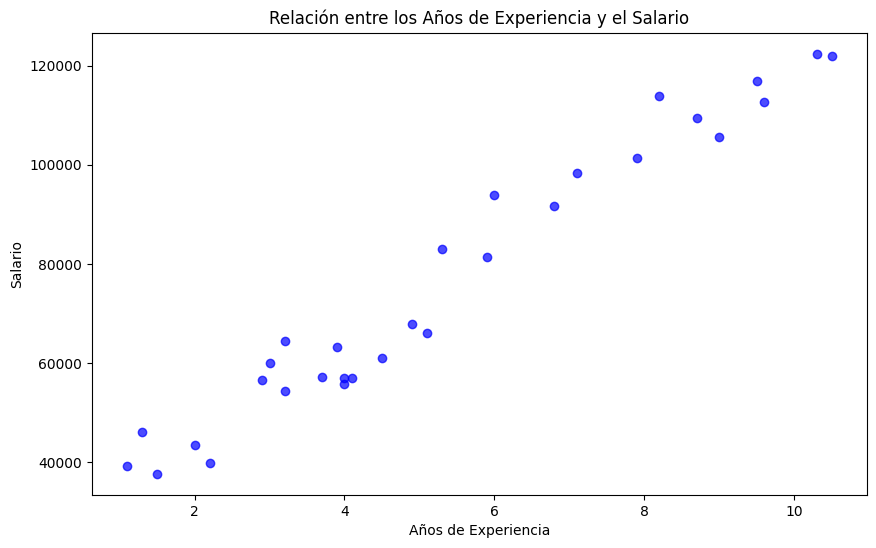

In [18]:
# Visualizar la distribución de los datos
plt.figure(figsize=(10, 6))
plt.scatter(df["YearsExperience"], df["Salary"], color='blue', alpha=0.7)
plt.xlabel("Años de Experiencia")
plt.ylabel("Salario")
plt.title("Relación entre los Años de Experiencia y el Salario")
plt.show()

Sin duda alguna, se puede ver claramente que cuantos más años de experiencia mayor es el sueldo que cobra una persona.

## 5. División de los Datos

Al tratarse de tan pocos datos podríamos hacer uso de otras técnicas, como la validación cruzada. Sin embargo, al tratarse de un proyecto sencillo e introductorio lo vamos a dividir en dos: el conjunto para entrenamiento y otro para validación. Nos olvidaremos de la parte de test para este proyecto.



Como lo que queremos es predecir el salario dado los años de experiencia, tomaremos como varable objetivo el salario.

Hay que tener en cuenta también que, al trabajar con una sola variable para predecir, y además al estar en un rango de valores razonable, no es necesario realizar una transformación (estandarizar o normalizar) de los datos.

In [23]:
X = df[["YearsExperience"]]
y = df[["Salary"]]

La partición que vamos a hacer será la de 80% entrenamiento y 20% validación.

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape[0]} muestras")
print(f"Datos de prueba: {X_val.shape[0]} muestras")

Datos de entrenamiento: 24 muestras
Datos de prueba: 6 muestras


## 6. Crear y Entrenar el Modelo

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Imprimir los coeficientes del modelo
print(f"Coeficiente de la recta (pendiente): {model.coef_[0]}")
print(f"Intersección (ordenada al origen): {model.intercept_}")

Coeficiente de la recta (pendiente): [9423.81532303]
Intersección (ordenada al origen): [25321.58301178]


## 7. Evaluación del Modelo

Para la evaluación del modelo vamos a usar el error cuadrático medio, para saber cuánto se ha equivocado en promedio el modelo al hacer las predicciones. Además, se calculará el coeficiente de determinación para saber qué porcentaje de variabilidad en los datos puede explicar el modelo.

In [28]:
# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_val)

# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R²)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Error cuadrático medio (MSE): 49830096.85590839
Coeficiente de determinación (R²): 0.9024461774180497


In [31]:
RMSE = np.sqrt(mse)
print("Raíz del MSE (RMSE):", RMSE)

Raíz del MSE (RMSE): 7059.04362190151


## 8. Visualización de Resultados

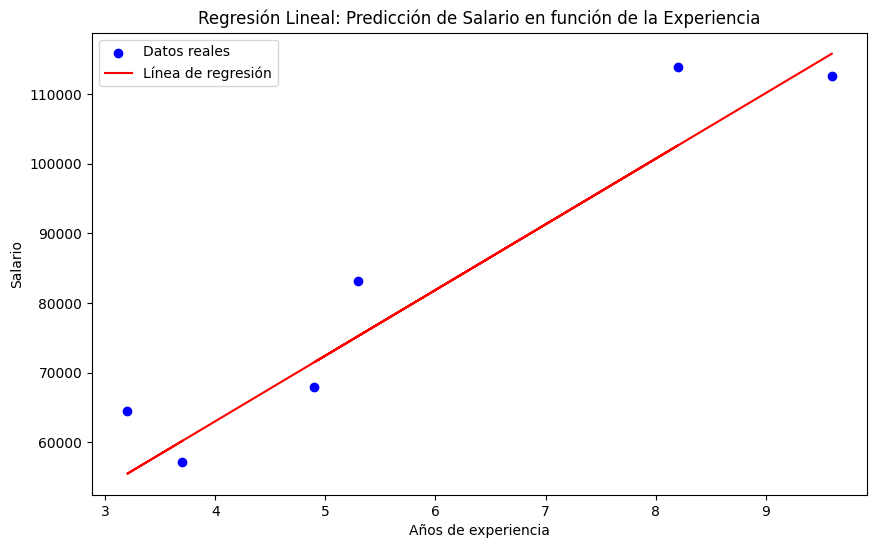

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(X_val, y_val, color='blue', label="Datos reales")
plt.plot(X_val, y_pred, color='red', label="Línea de regresión")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.title("Regresión Lineal: Predicción de Salario en función de la Experiencia")
plt.legend()
plt.show()

## 9. Conclusiones

En este proyecto, se desarrolló un modelo de regresión lineal simple para predecir el salario de un empleado en función de sus años de experiencia, utilizando un conjunto de datos con 30 muestras. Primero, se exploraron los datos mediante estadísticas descriptivas y visualizaciones, identificando una relación lineal positiva entre ambas variables. Posteriormente, los datos se dividieron en conjuntos de entrenamiento, validación para garantizar una evaluación justa del modelo.

El coeficiente de determinación $(R^2)$ de 0.902 indica que el modelo explica aproximadamente el 90.2% de la variabilidad en los salarios, lo que sugiere una relación fuerte entre ambas variables. El error cuadrático medio (MSE) de 49,830,096.86 y su raíz cuadrada (RMSE) de 7,059.04 muestran que, en promedio, el modelo comete un error de alrededor de 7,059 unidades monetarias al predecir los salarios. Dado que los salarios oscilan entre 37,731 y 122,391, este error es razonable, confirmando que el modelo tiene un ajuste adecuado y es útil para este problema.